In [ ]:
import torch, pdb
from torch.utils.data import DataLoader
from torch import nn
from torchvision import transforms
from torchvision.datasets import MNIST
from torchvision.utils import make_grid
from tqdm.auto import tqdm
import matplotlib.pyplot as plt


In [ ]:
# Visualization Function

def show(tensor, ch=1, size = (28,28), num=16):

  # tensor: 128 * 784
  data = tensor.detach().cpu().view(-1, ch, *size) # 128 x 1 x 28 x 28
  grid = make_grid(data[:num], nrow=4).permute(1,2,0) # 1 x 28 x 28 = 28 x 28 x 1
  plt.imshow(grid)
  plt.show()


In [ ]:
# setup of the main parameters and hyperparameters

epochs = 50
cur_step = 0
info_step = 300
mean_gen_loss = 0
mean_disc_loss = 0

z_dim = 64
learning_rate = 0.00001
loss_func = nn.BCEWithLogitsLoss()

b_size = 128
device = 'cuda'

dataloader = DataLoader(MNIST('.', download = True, transform = transforms.ToTensor()), shuffle = True, batch_size = b_size)

# number of steps = 60000 / 128 = 468.75

In [ ]:
# Declare our models

# Generator

def genBlock(input, out):
  return nn.Sequential (
      nn.Linear(input, out),
      nn.BatchNorm1d(out),
      nn.ReLU(inplace=True)
  )

class Generator(nn.Module):
  def __init__(self, z_dim=64, i_dim=784, h_dim=128):
    super().__init__()
    self.gen = nn.Sequential(
        genBlock(z_dim, h_dim),
        genBlock(h_dim, h_dim*2),
        genBlock(h_dim*2, h_dim*4),
        genBlock(h_dim*4, h_dim*8),
        nn.Linear(h_dim*8, i_dim),
        nn.Sigmoid()
    )

  def forward(self, noise):
    return self.gen(noise)

def gen_noise(number, z_dim):
  return torch.randn(number, z_dim).to(device)

# Discriminator
def discBlock(input, out):
  return nn.Sequential(
      nn.Linear(input, out),
      nn.LeakyReLU(0.2)
  )

class Discriminator(nn.Module):
  def __init__(self, i_dim=784, h_dim=256):
    super().__init__()
    self.disc = nn.Sequential(
        discBlock(i_dim, h_dim*4), # 784, 1024
        discBlock(h_dim*4, h_dim*2), # 1024, 512
        discBlock(h_dim*2, h_dim), # 512, 256
        nn.Linear(h_dim, 1) # 256, 1
    )

  def forward(self, image):
    return self.disc(image)



In [ ]:
gen = Generator(z_dim).to(device)
gen_opt = torch.optim.Adam(gen.parameters(), lr = learning_rate)
disc = Discriminator().to(device)
disc_opt = torch.optim.Adam(disc.parameters(), lr = learning_rate)

torch.Size([128, 1, 28, 28]) torch.Size([128])
tensor([0, 1, 9, 0, 3, 4, 7, 8, 4, 1])


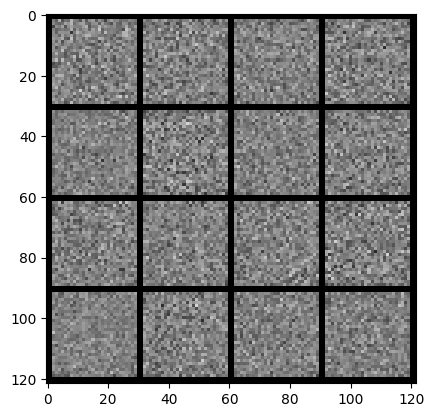

In [ ]:
x,y=next(iter(dataloader))
print(x.shape, y.shape)
print(y[:10])

noise = gen_noise(b_size, z_dim)
fake = gen(noise)
show(fake)

In [ ]:
# Calculating the Loss

#Generator Loss
def calc_gen_loss(loss_func, gen, disc, number, z_dim):
  noise = gen_noise(number, z_dim)
  fake = gen(noise)
  prediction = disc(fake)
  targets = torch.ones_like(prediction)
  gen_loss = loss_func(prediction, targets)

  return gen_loss

def calc_disc_loss(loss_func, gen, disc, number, real, z_dim):
  noise = gen_noise(number, z_dim)
  fake = gen(noise)
  disc_fake = disc(fake.detach())
  disc_fake_target = torch.zeros_like(disc_fake)
  disc_fake_loss = loss_func(disc_fake, disc_fake_target)

  disc_real = disc(real)
  disc_real_targets = torch.ones_like(disc_real)
  disc_real_loss = loss_func(disc_real, disc_real_targets)

  disc_loss = (disc_fake_loss + disc_real_loss)/2

  return disc_loss

  0%|          | 0/469 [00:00<?, ?it/s]

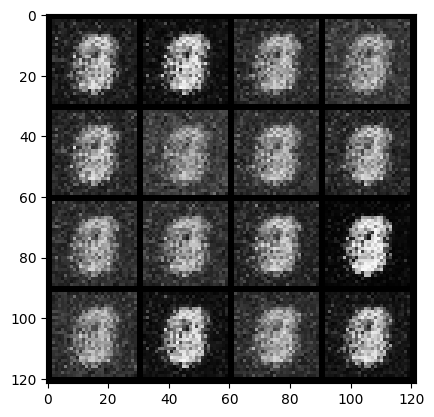

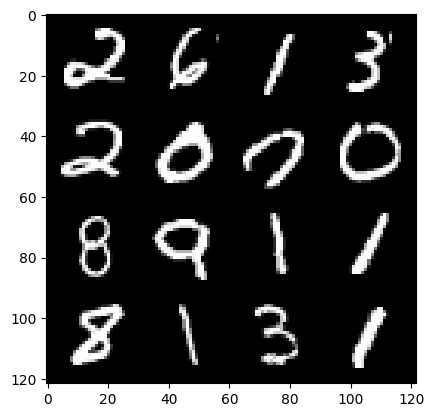

0 : step 300 / Gen Loss: 1.9577477250496542 / Disc Loss: 0.3434254923711218


  0%|          | 0/469 [00:00<?, ?it/s]

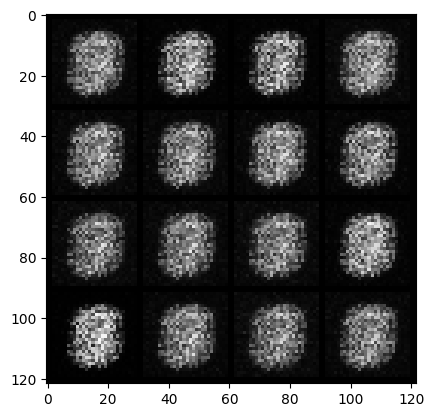

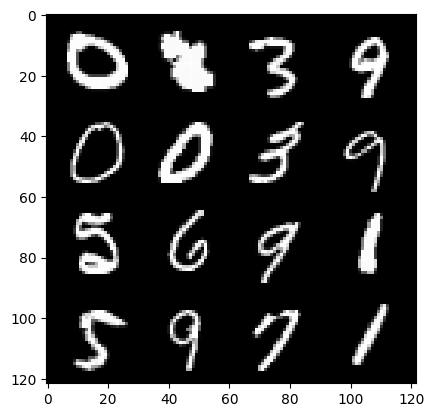

1 : step 600 / Gen Loss: 3.5275811783472695 / Disc Loss: 0.11979582468668618


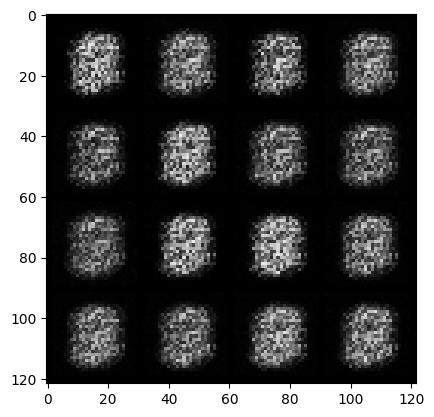

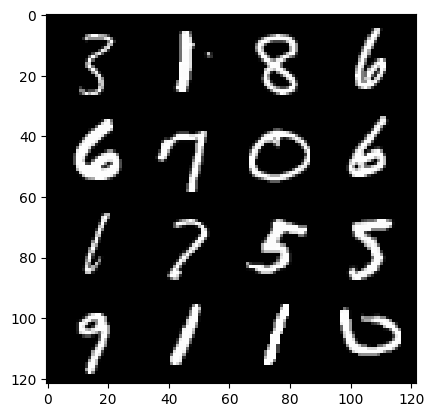

1 : step 900 / Gen Loss: 3.45602774779002 / Disc Loss: 0.05355812724679707


  0%|          | 0/469 [00:00<?, ?it/s]

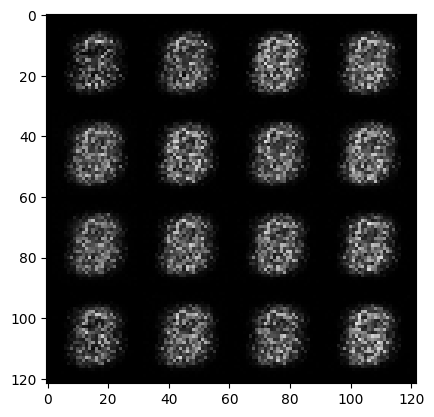

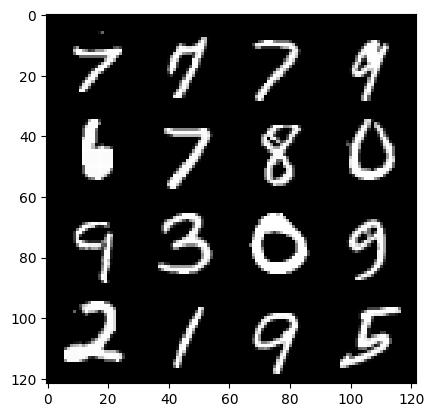

2 : step 1200 / Gen Loss: 3.525818477471668 / Disc Loss: 0.03771438833946982


  0%|          | 0/469 [00:00<?, ?it/s]

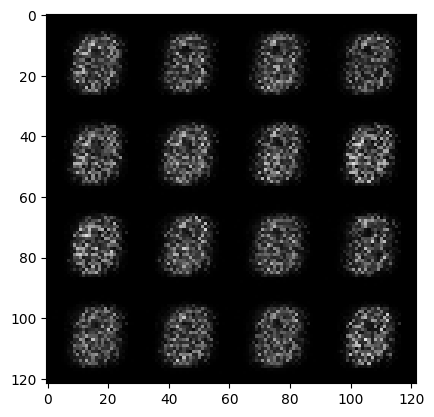

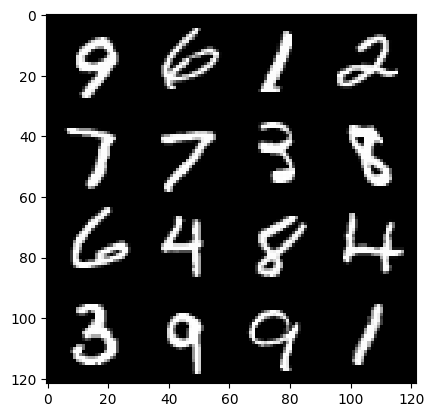

3 : step 1500 / Gen Loss: 3.5183372481664006 / Disc Loss: 0.03810446092858907


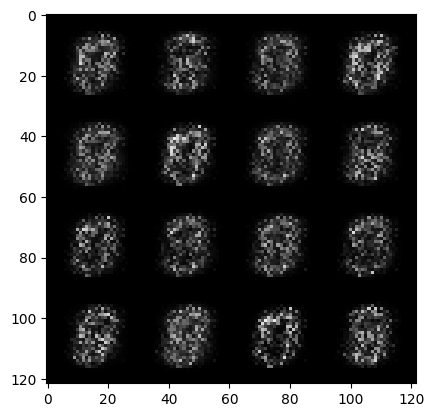

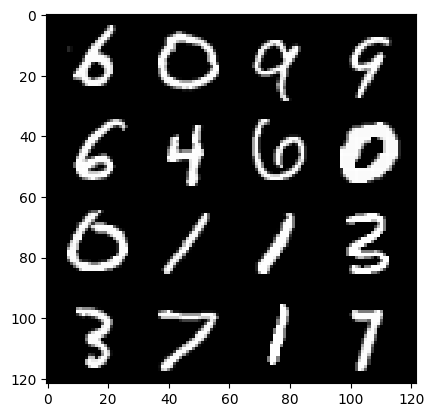

3 : step 1800 / Gen Loss: 3.4899353512128193 / Disc Loss: 0.0426451075139145


  0%|          | 0/469 [00:00<?, ?it/s]

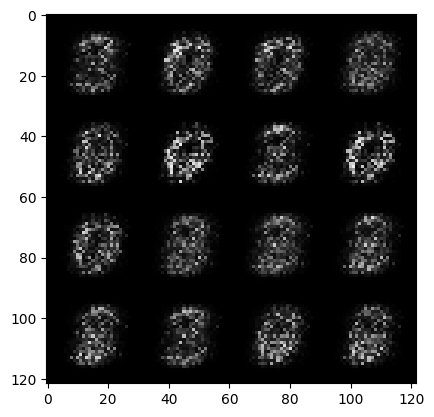

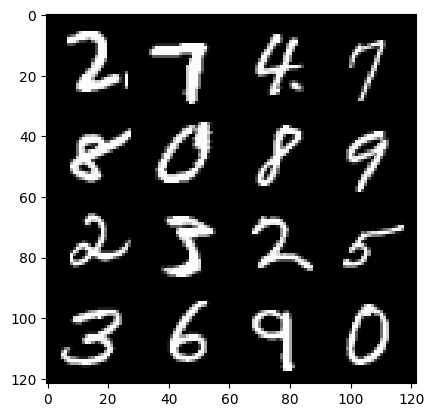

4 : step 2100 / Gen Loss: 3.828465495904289 / Disc Loss: 0.03647347824027138


  0%|          | 0/469 [00:00<?, ?it/s]

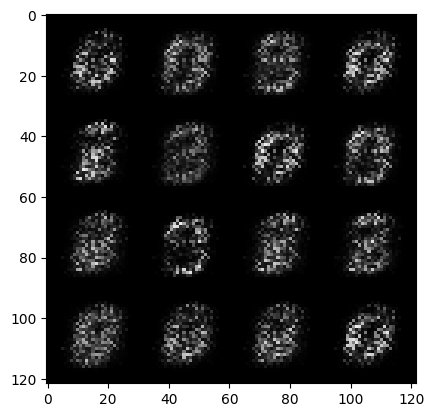

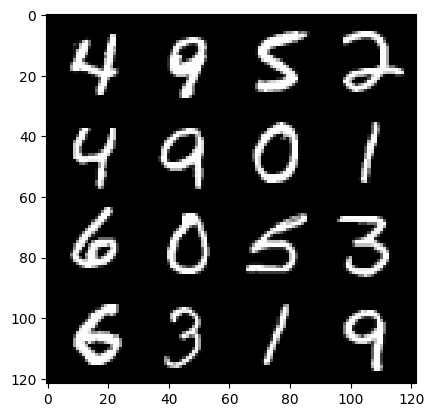

5 : step 2400 / Gen Loss: 4.1498739894231145 / Disc Loss: 0.031475523579865695


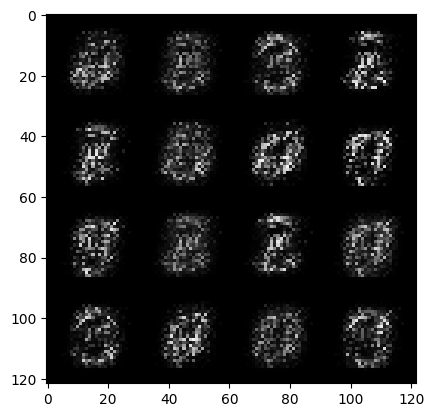

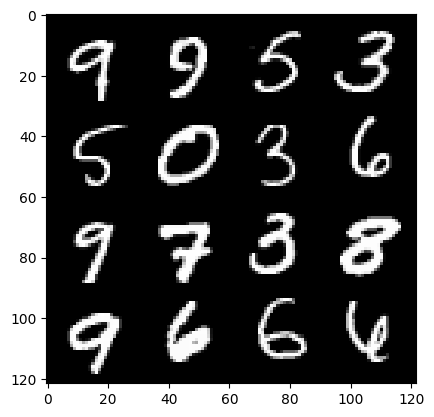

5 : step 2700 / Gen Loss: 4.461433553695679 / Disc Loss: 0.02560652346971135


  0%|          | 0/469 [00:00<?, ?it/s]

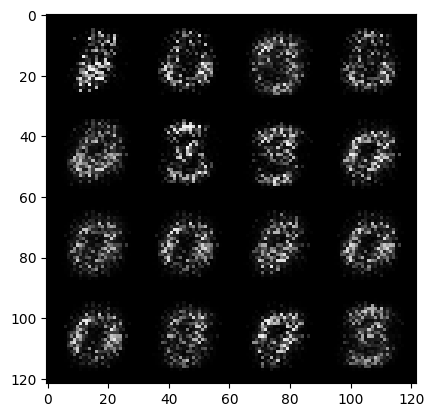

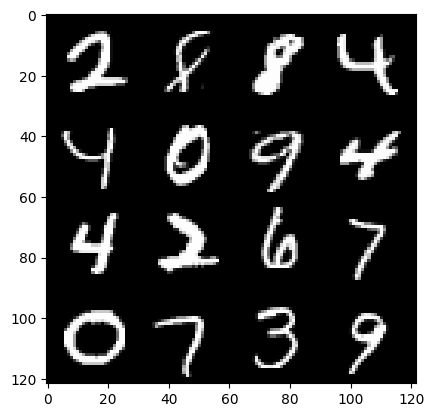

6 : step 3000 / Gen Loss: 4.864907908439639 / Disc Loss: 0.02282337545727691


  0%|          | 0/469 [00:00<?, ?it/s]

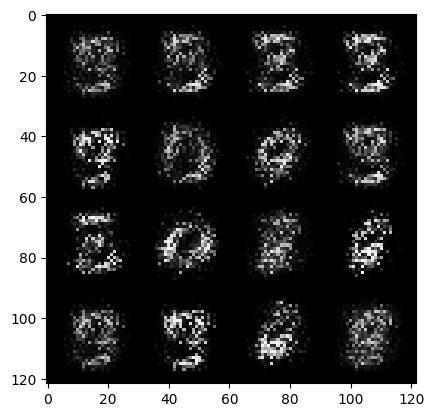

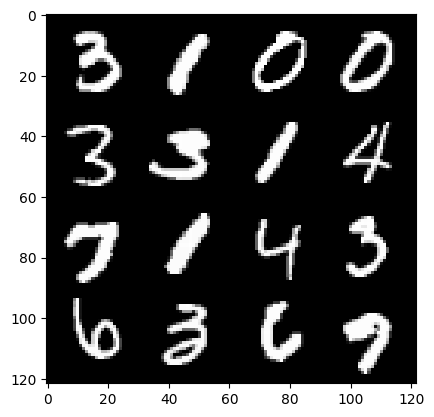

7 : step 3300 / Gen Loss: 5.225664075215654 / Disc Loss: 0.02051059289835393


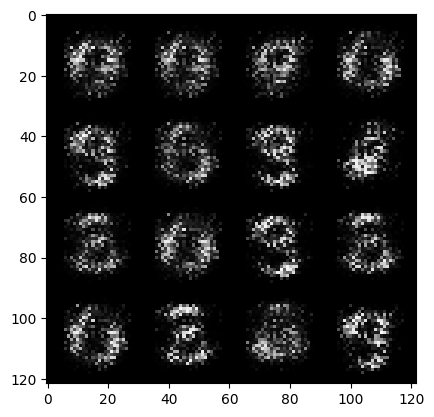

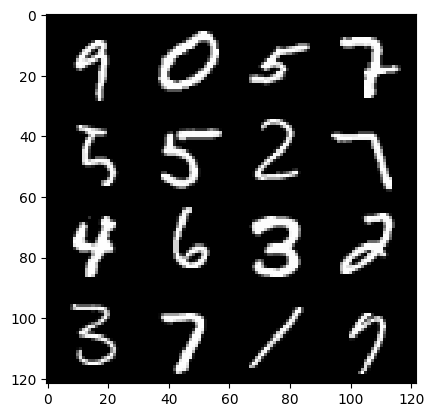

7 : step 3600 / Gen Loss: 5.423771649996438 / Disc Loss: 0.019355828734114768


  0%|          | 0/469 [00:00<?, ?it/s]

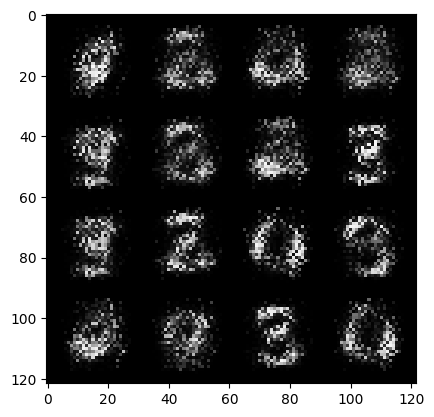

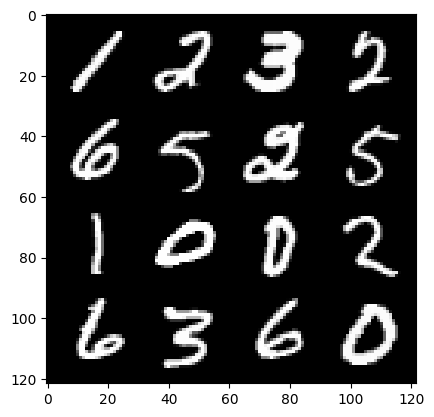

8 : step 3900 / Gen Loss: 5.606440030733744 / Disc Loss: 0.019630618694548806


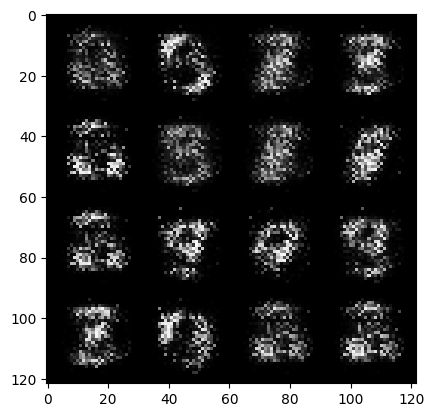

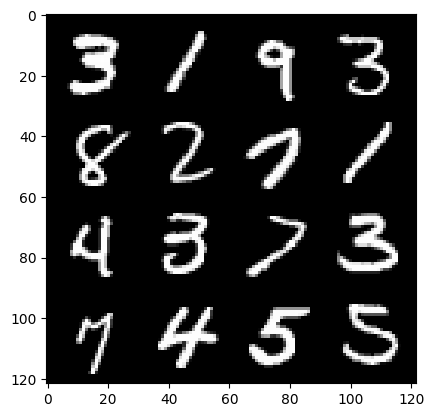

8 : step 4200 / Gen Loss: 5.692664516766864 / Disc Loss: 0.018163194530643526


  0%|          | 0/469 [00:00<?, ?it/s]

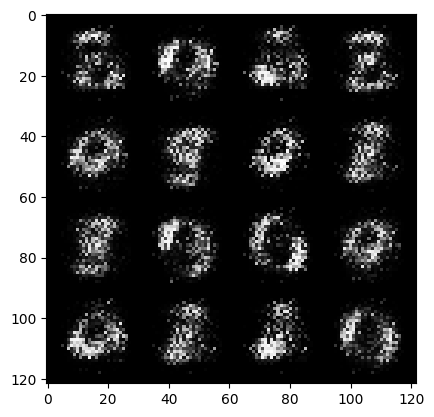

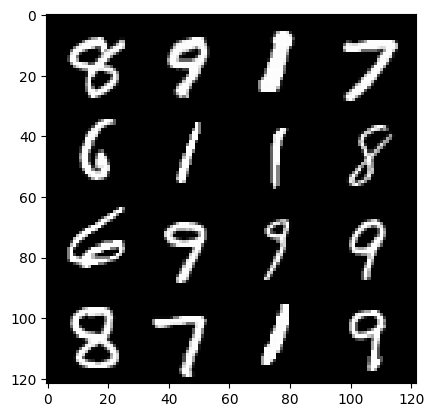

9 : step 4500 / Gen Loss: 5.636849246025083 / Disc Loss: 0.01755831240055461


  0%|          | 0/469 [00:00<?, ?it/s]

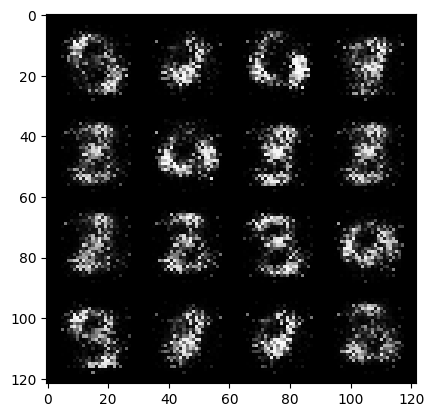

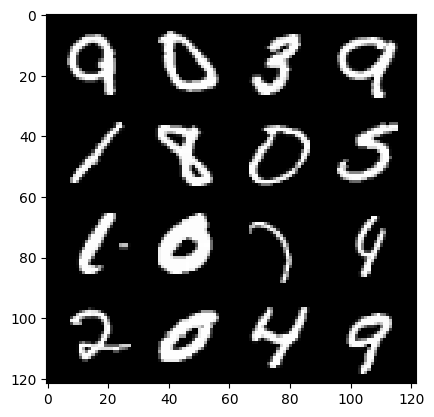

10 : step 4800 / Gen Loss: 5.861384603182474 / Disc Loss: 0.01451786798114577


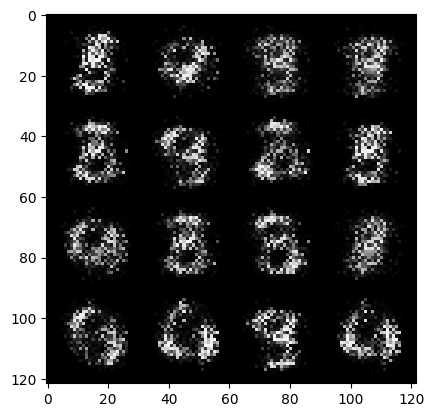

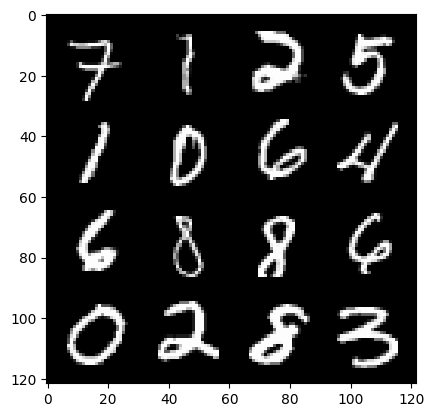

10 : step 5100 / Gen Loss: 6.306782387097675 / Disc Loss: 0.0120811425630624


  0%|          | 0/469 [00:00<?, ?it/s]

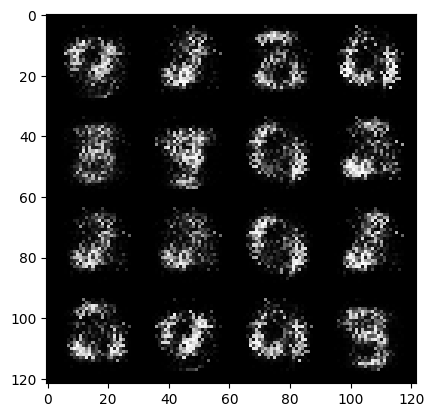

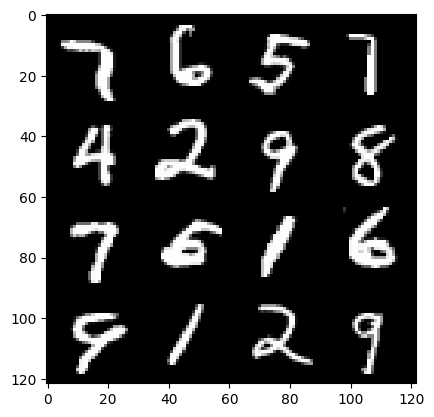

11 : step 5400 / Gen Loss: 6.4558488655090365 / Disc Loss: 0.01105781404534354


  0%|          | 0/469 [00:00<?, ?it/s]

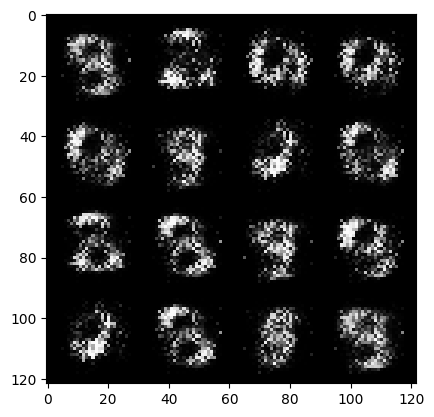

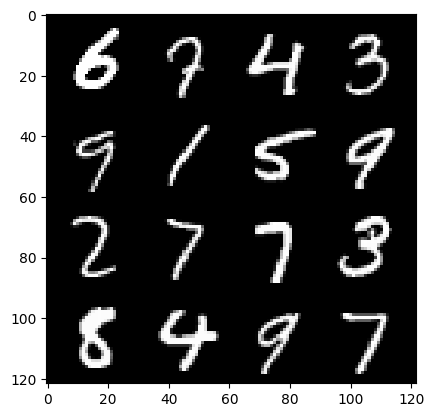

12 : step 5700 / Gen Loss: 6.280473742485044 / Disc Loss: 0.010705645383956523


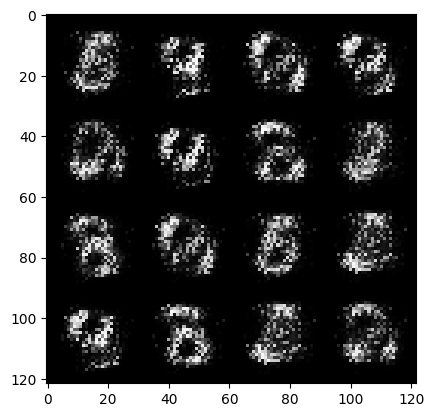

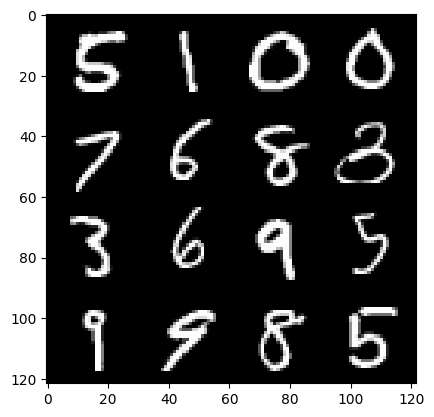

12 : step 6000 / Gen Loss: 6.1754506047566755 / Disc Loss: 0.009941410226747384


  0%|          | 0/469 [00:00<?, ?it/s]

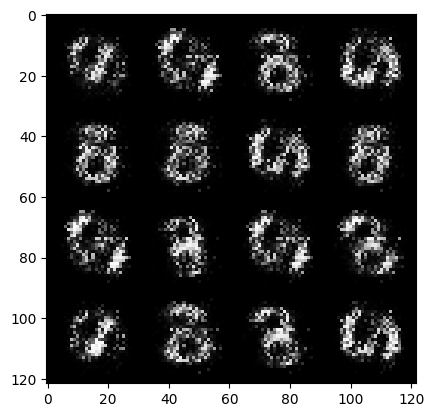

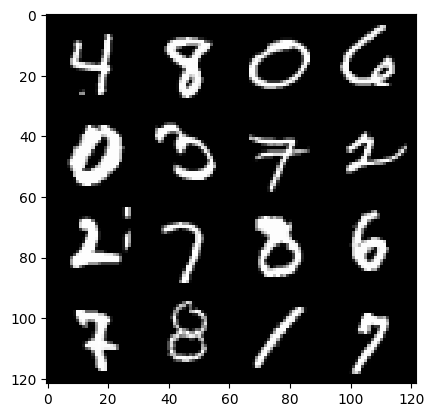

13 : step 6300 / Gen Loss: 6.471659884452819 / Disc Loss: 0.011035213297388205


  0%|          | 0/469 [00:00<?, ?it/s]

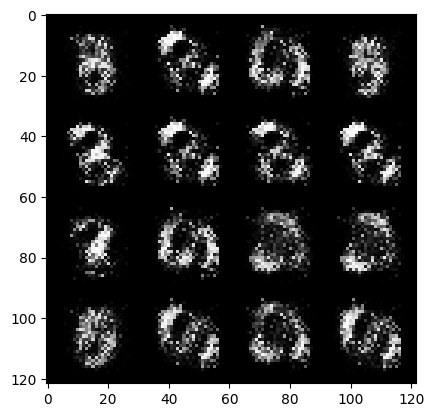

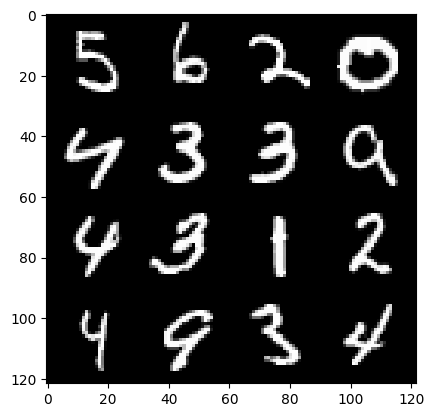

14 : step 6600 / Gen Loss: 6.865094765027364 / Disc Loss: 0.011290128785961617


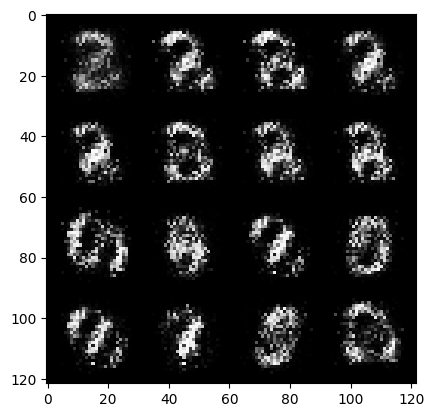

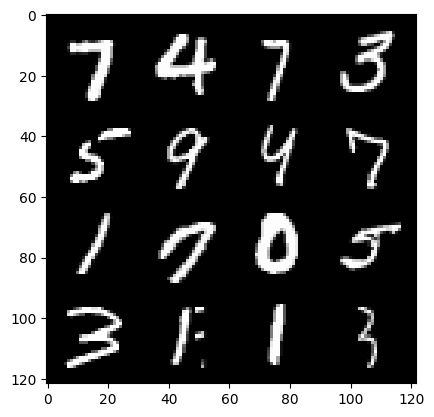

14 : step 6900 / Gen Loss: 6.666863946914668 / Disc Loss: 0.011974010438813512


  0%|          | 0/469 [00:00<?, ?it/s]

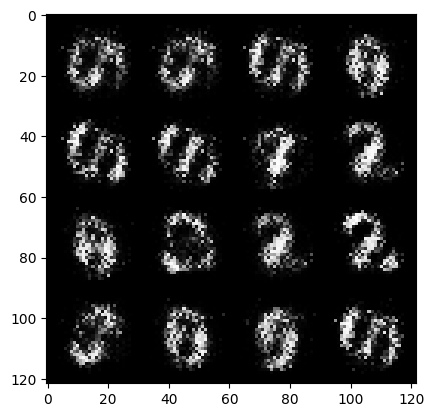

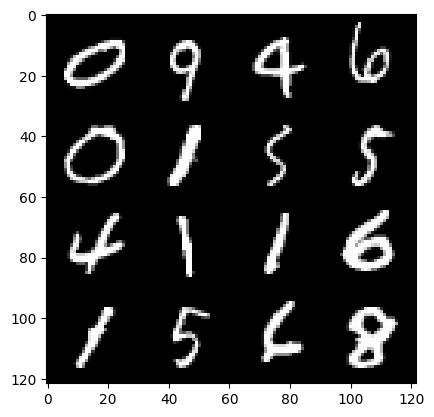

15 : step 7200 / Gen Loss: 6.6640785392125474 / Disc Loss: 0.012003898307836311


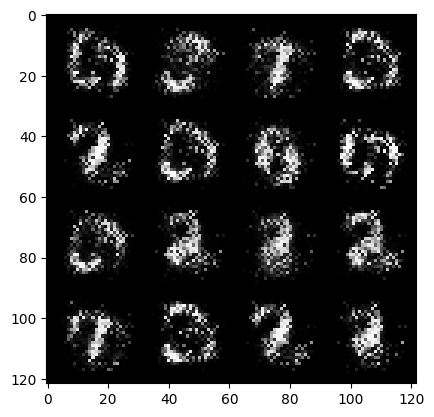

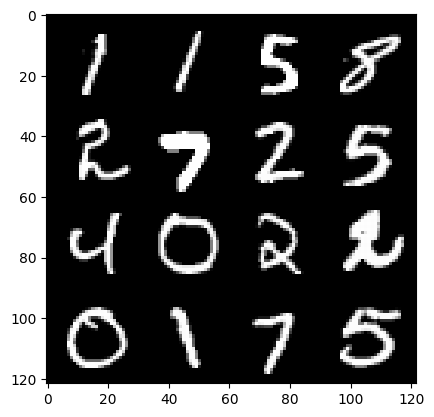

15 : step 7500 / Gen Loss: 6.617143224080401 / Disc Loss: 0.009694092416514954


  0%|          | 0/469 [00:00<?, ?it/s]

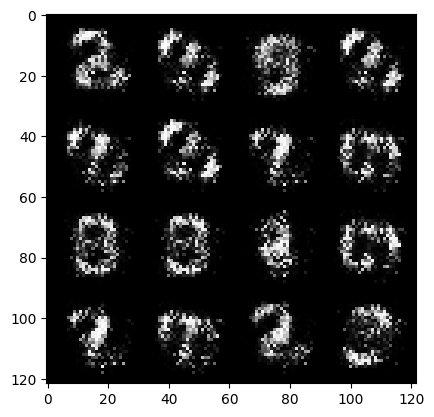

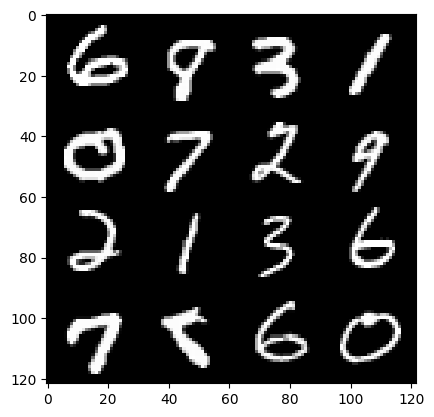

16 : step 7800 / Gen Loss: 7.053987938563028 / Disc Loss: 0.007674985131404056


  0%|          | 0/469 [00:00<?, ?it/s]

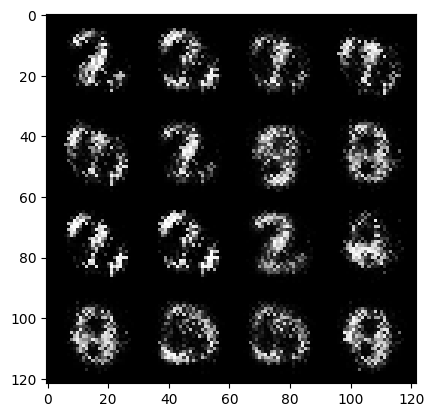

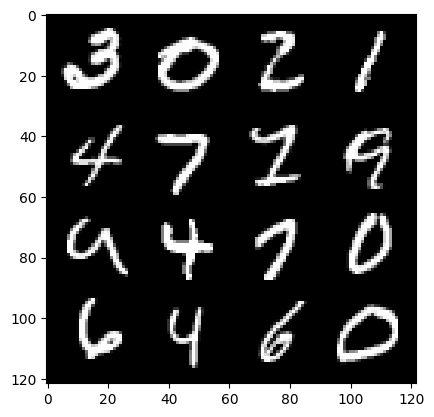

17 : step 8100 / Gen Loss: 7.212597843805944 / Disc Loss: 0.009755640461420016


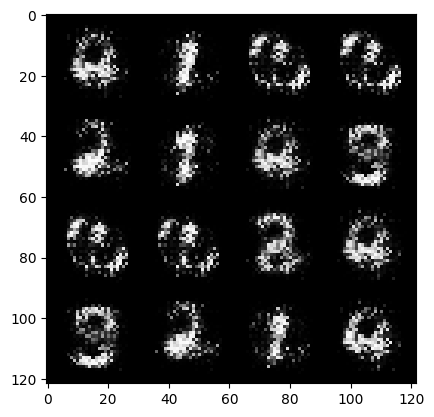

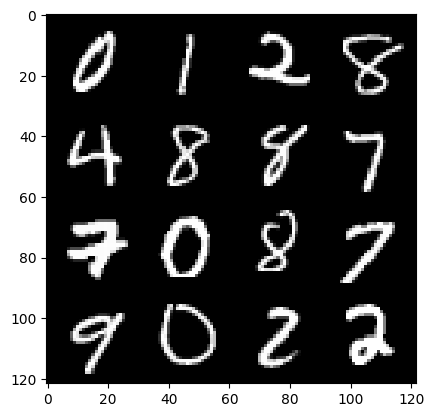

17 : step 8400 / Gen Loss: 6.862526911099753 / Disc Loss: 0.010452541836226976


  0%|          | 0/469 [00:00<?, ?it/s]

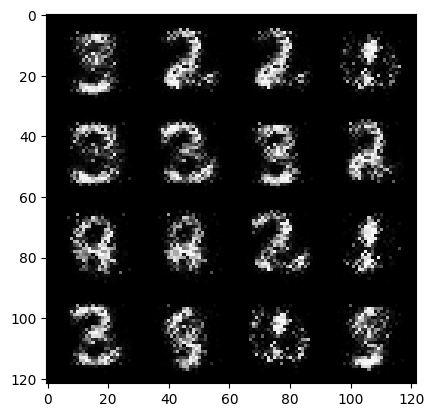

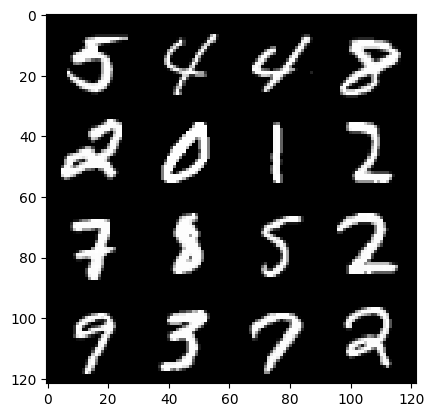

18 : step 8700 / Gen Loss: 6.739012316068017 / Disc Loss: 0.0111056085753565


  0%|          | 0/469 [00:00<?, ?it/s]

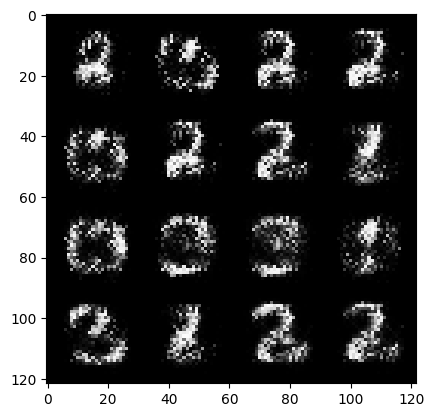

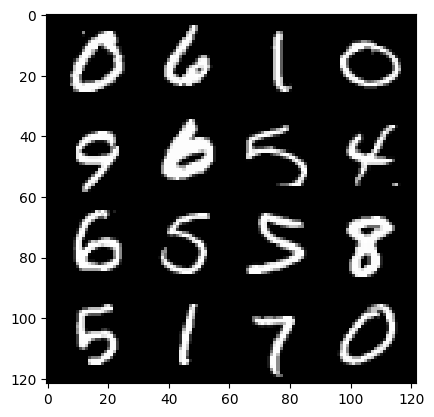

19 : step 9000 / Gen Loss: 6.551382279396053 / Disc Loss: 0.011040301694689942


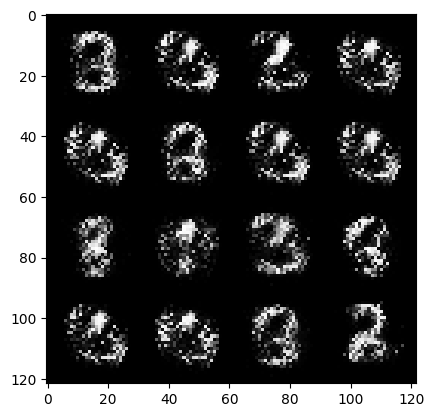

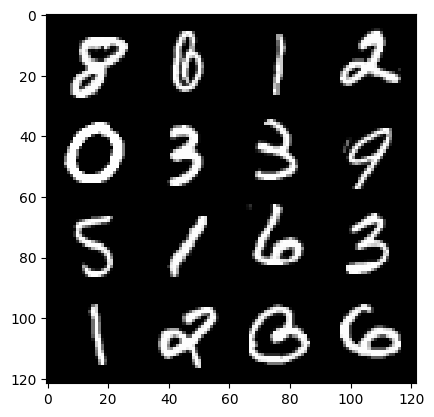

19 : step 9300 / Gen Loss: 6.608259615898133 / Disc Loss: 0.007881823964416983


  0%|          | 0/469 [00:00<?, ?it/s]

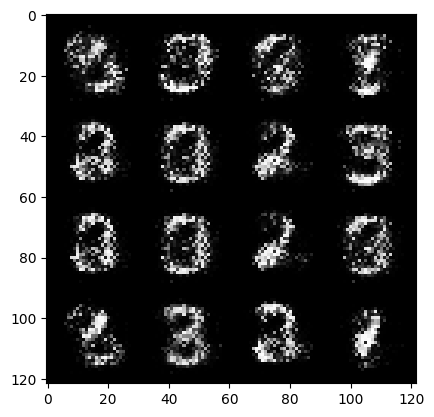

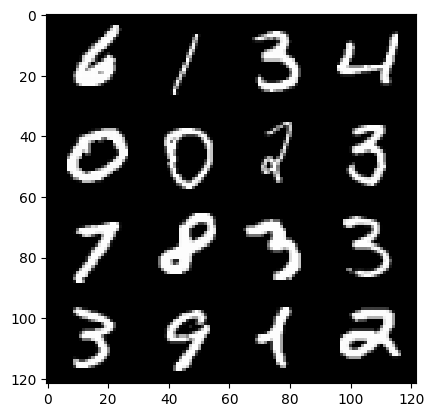

20 : step 9600 / Gen Loss: 7.071251562436419 / Disc Loss: 0.007756887692570063


  0%|          | 0/469 [00:00<?, ?it/s]

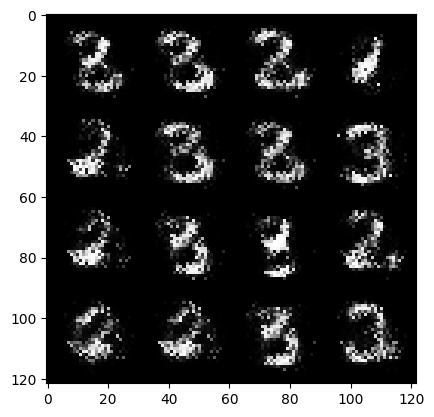

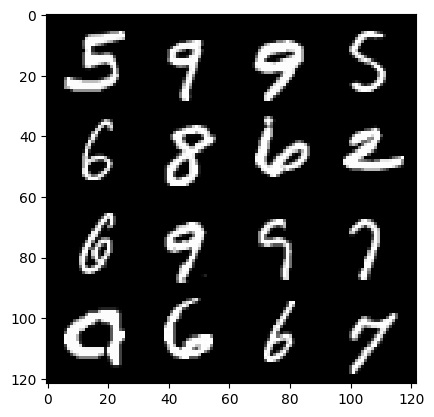

21 : step 9900 / Gen Loss: 6.98613171259562 / Disc Loss: 0.009543655195351065


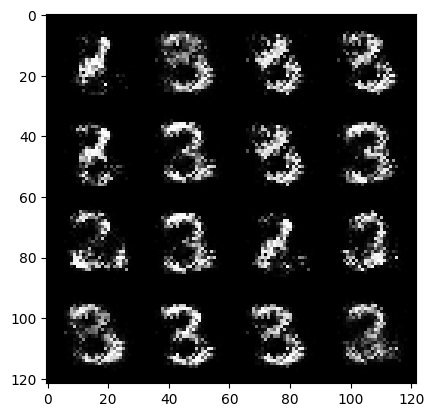

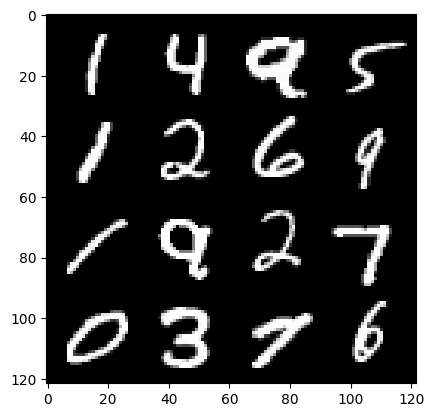

21 : step 10200 / Gen Loss: 6.977327016194657 / Disc Loss: 0.008088190120567261


  0%|          | 0/469 [00:00<?, ?it/s]

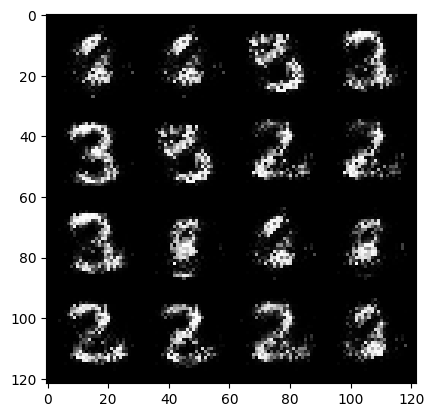

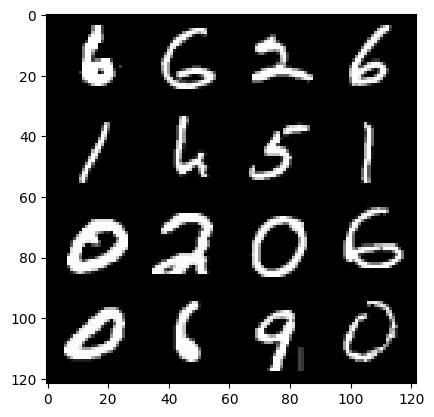

22 : step 10500 / Gen Loss: 7.274495592117304 / Disc Loss: 0.009989141691864155


  0%|          | 0/469 [00:00<?, ?it/s]

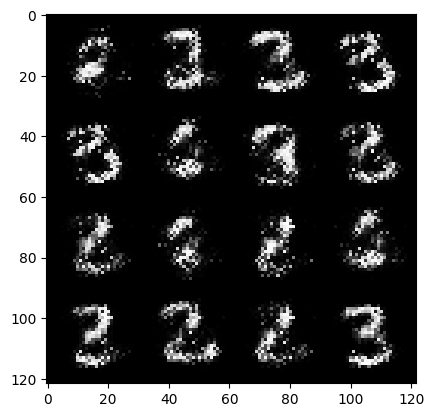

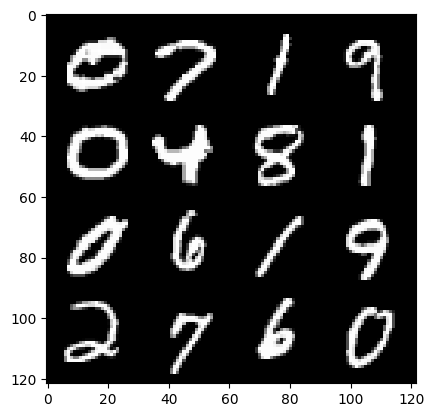

23 : step 10800 / Gen Loss: 6.872467114130657 / Disc Loss: 0.010250987313532575


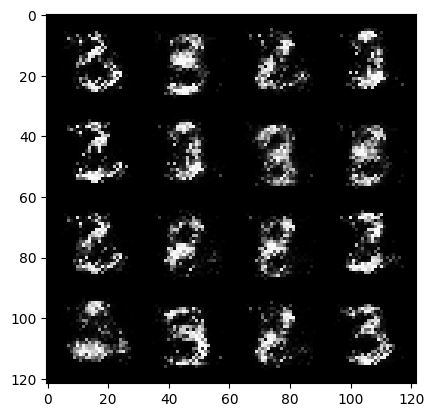

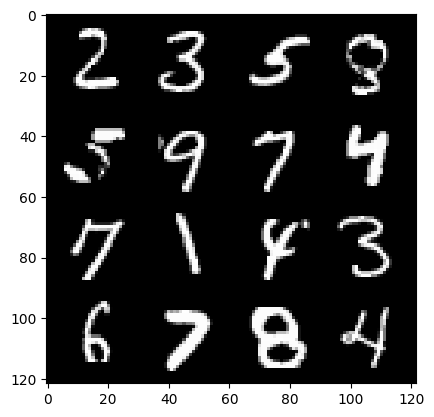

23 : step 11100 / Gen Loss: 7.246990331013994 / Disc Loss: 0.00898800147949563


  0%|          | 0/469 [00:00<?, ?it/s]

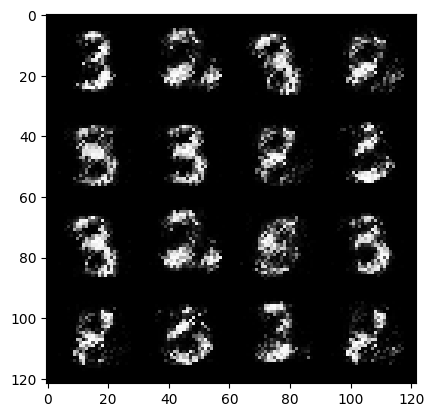

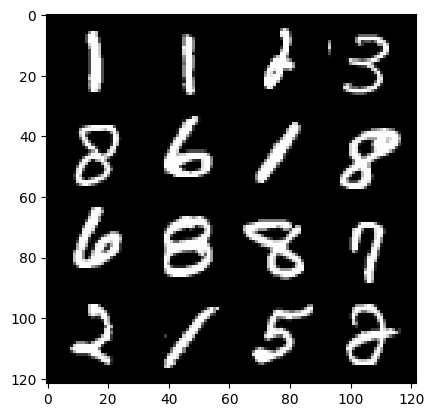

24 : step 11400 / Gen Loss: 7.908682519594829 / Disc Loss: 0.009545140507010124


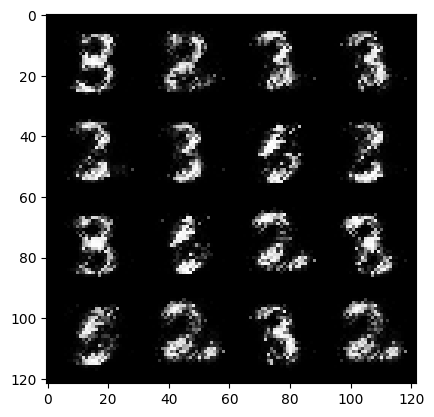

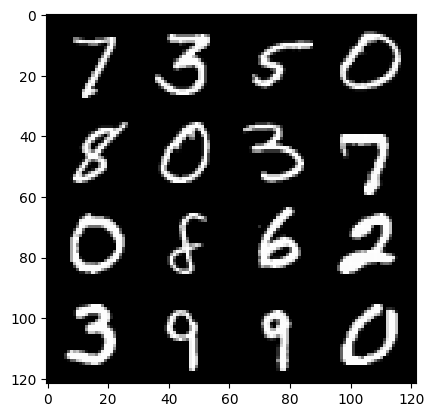

24 : step 11700 / Gen Loss: 6.959979964892067 / Disc Loss: 0.013366662464880698


  0%|          | 0/469 [00:00<?, ?it/s]

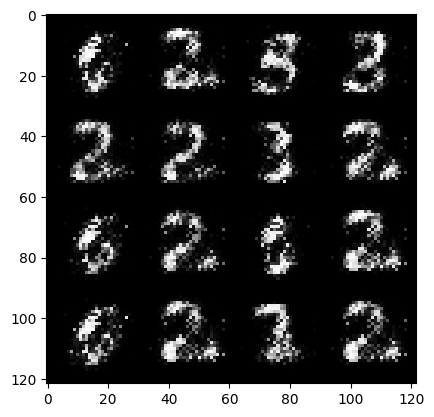

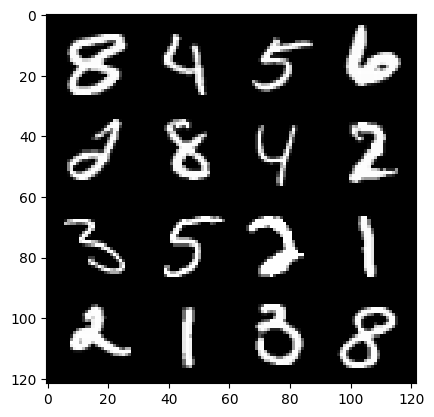

25 : step 12000 / Gen Loss: 6.829802165031427 / Disc Loss: 0.014697434208355845


  0%|          | 0/469 [00:00<?, ?it/s]

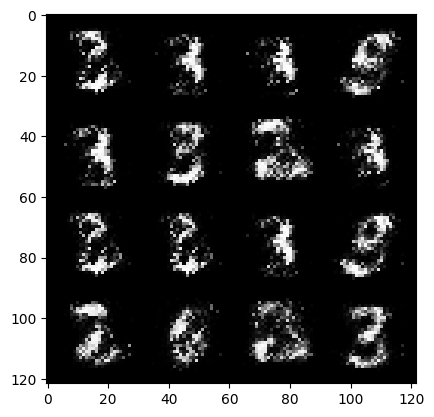

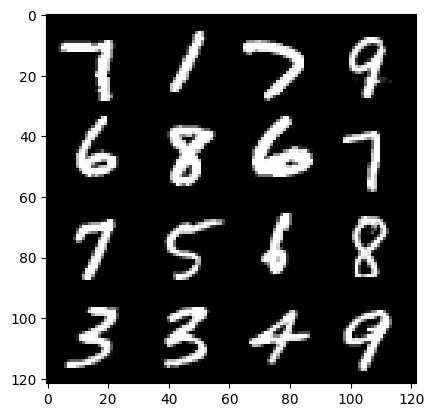

26 : step 12300 / Gen Loss: 7.295702489217125 / Disc Loss: 0.014379677940936149


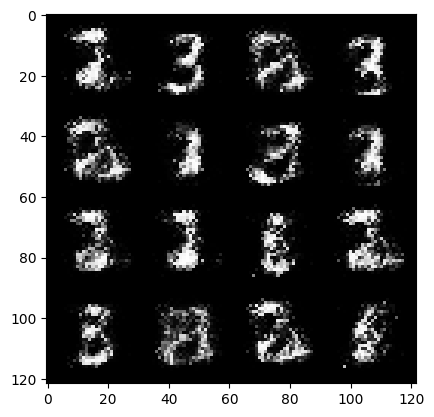

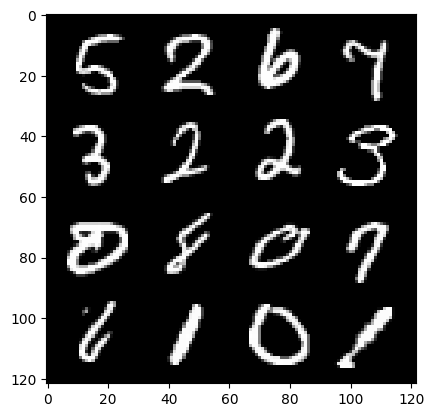

26 : step 12600 / Gen Loss: 7.826044659614566 / Disc Loss: 0.014171844796122358


  0%|          | 0/469 [00:00<?, ?it/s]

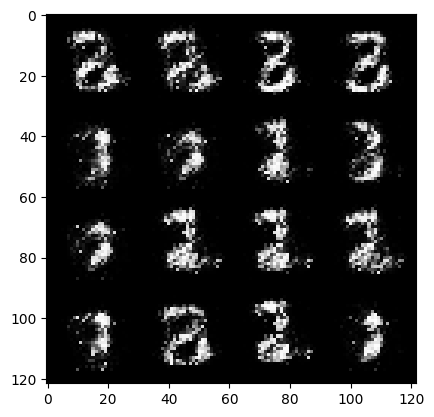

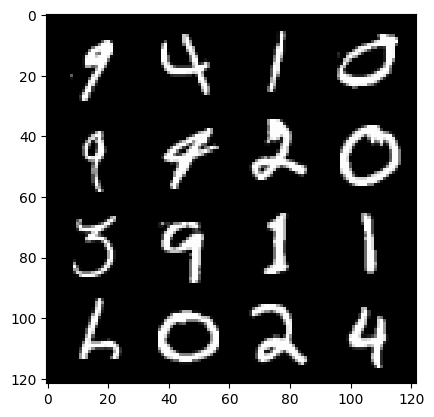

27 : step 12900 / Gen Loss: 7.3868033822377495 / Disc Loss: 0.013570434240003423


  0%|          | 0/469 [00:00<?, ?it/s]

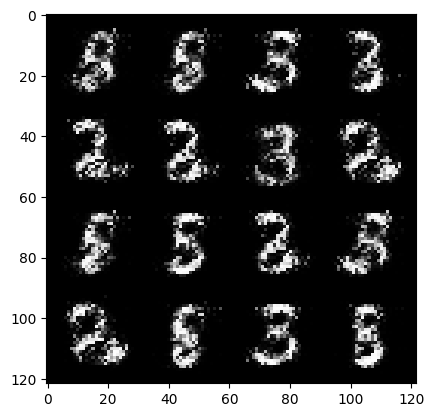

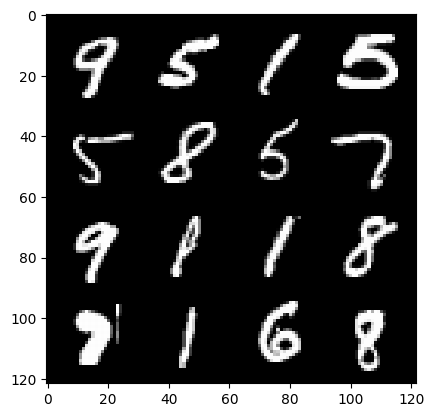

28 : step 13200 / Gen Loss: 7.021981142361956 / Disc Loss: 0.012295386079543589


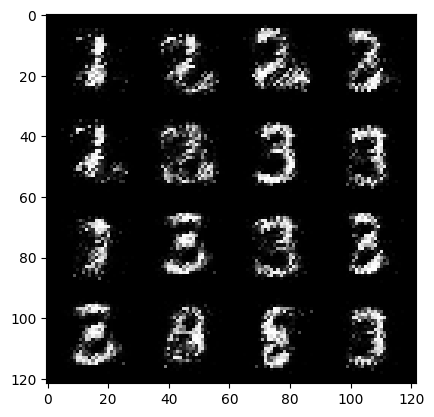

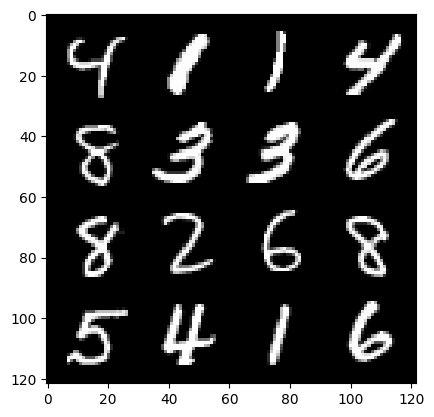

28 : step 13500 / Gen Loss: 6.913174591064444 / Disc Loss: 0.013471348984166989


  0%|          | 0/469 [00:00<?, ?it/s]

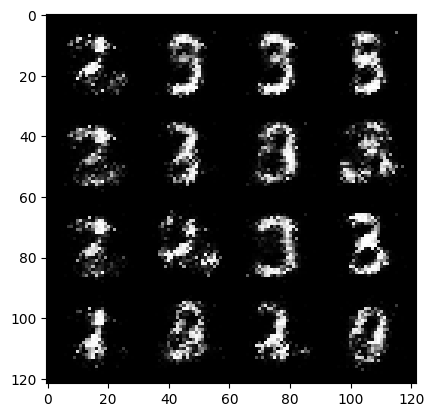

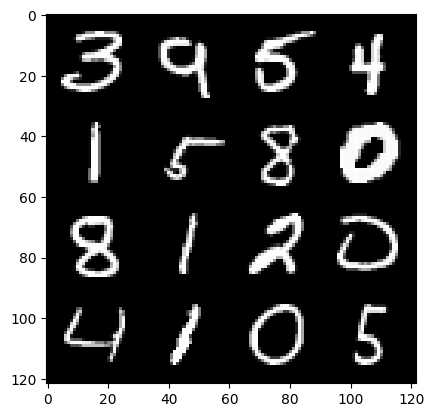

29 : step 13800 / Gen Loss: 6.909295668601989 / Disc Loss: 0.013836797870850816


  0%|          | 0/469 [00:00<?, ?it/s]

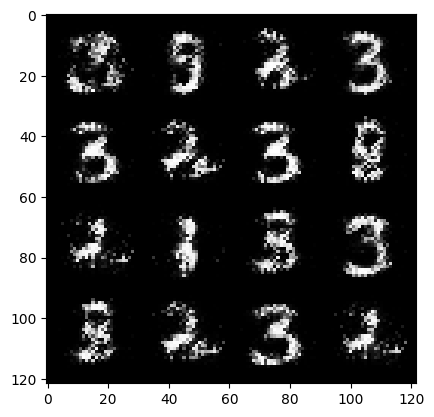

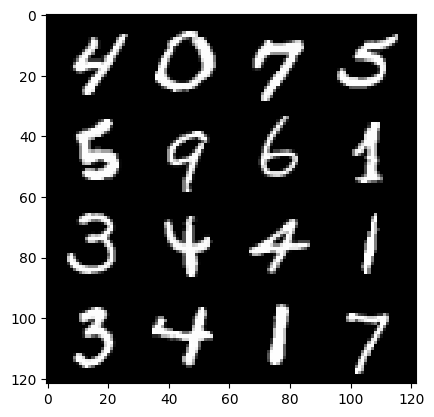

30 : step 14100 / Gen Loss: 6.604161324501037 / Disc Loss: 0.016265287527348852


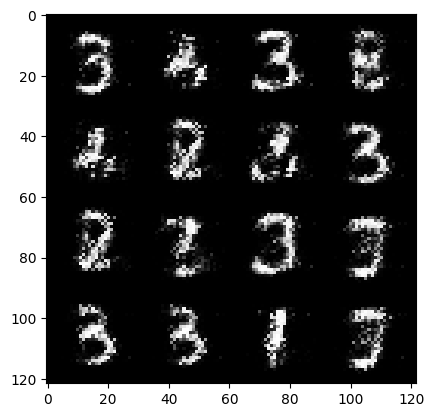

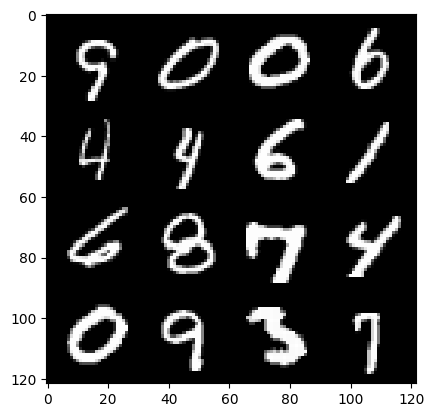

30 : step 14400 / Gen Loss: 6.768389167785647 / Disc Loss: 0.016583781299026046


  0%|          | 0/469 [00:00<?, ?it/s]

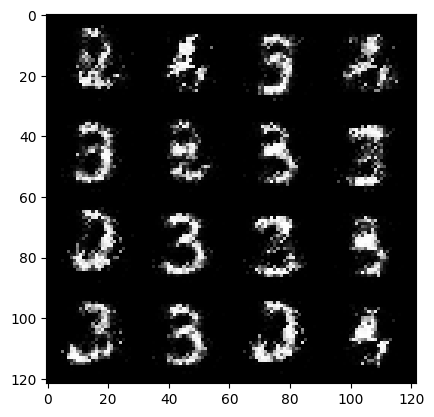

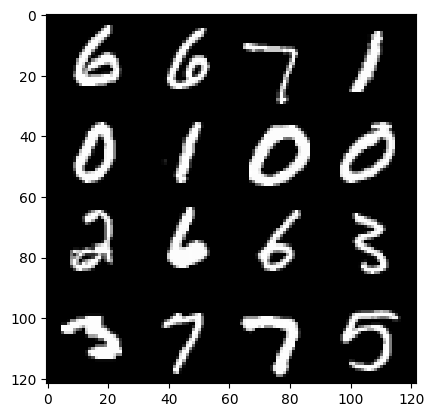

31 : step 14700 / Gen Loss: 6.673168067932129 / Disc Loss: 0.01706667218046884


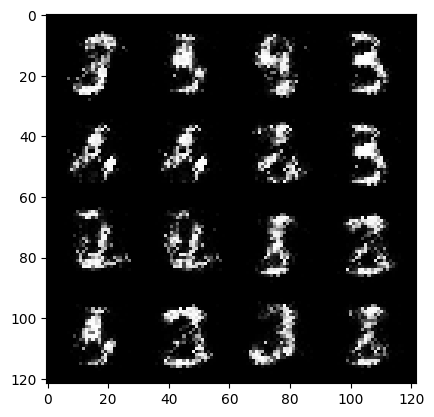

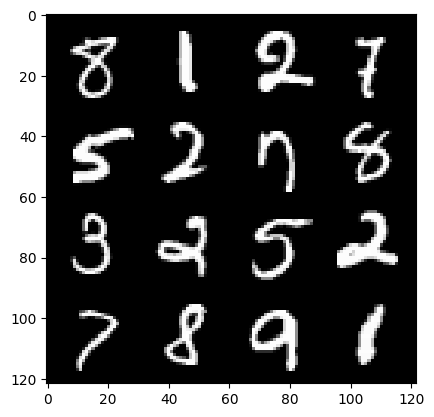

31 : step 15000 / Gen Loss: 6.187255705197655 / Disc Loss: 0.016909391422135125


  0%|          | 0/469 [00:00<?, ?it/s]

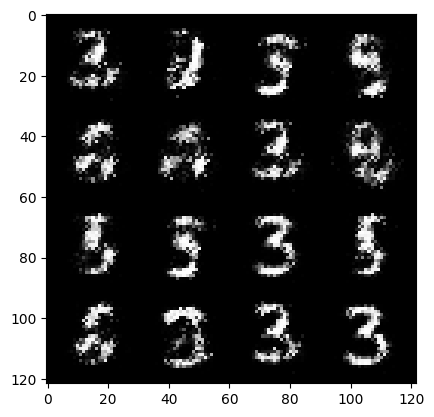

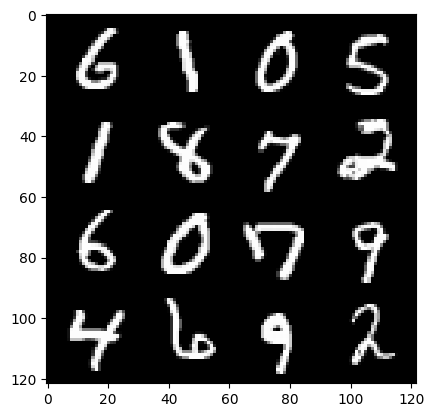

32 : step 15300 / Gen Loss: 6.469568932851152 / Disc Loss: 0.01914142706121008


  0%|          | 0/469 [00:00<?, ?it/s]

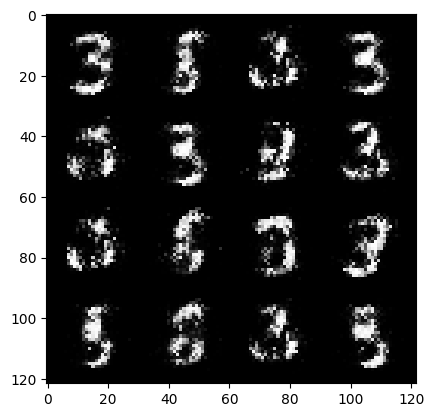

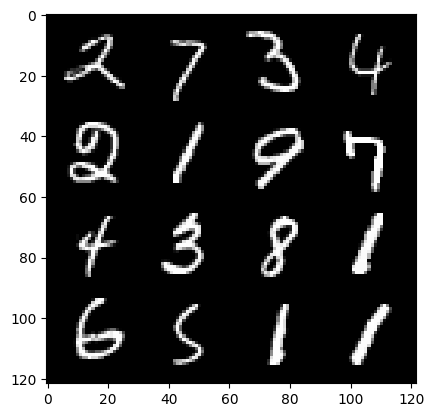

33 : step 15600 / Gen Loss: 6.597554551760357 / Disc Loss: 0.019052078486420217


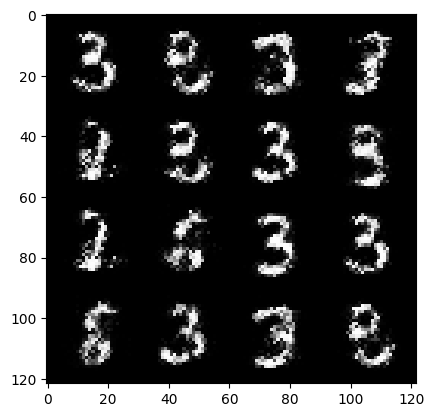

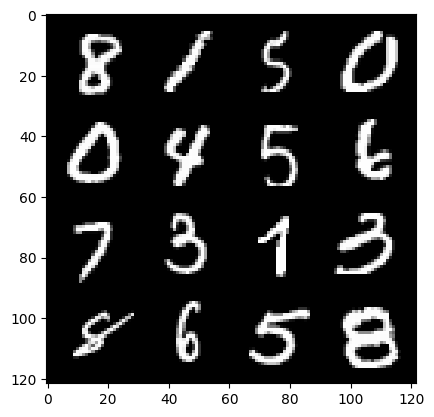

33 : step 15900 / Gen Loss: 6.38585213502248 / Disc Loss: 0.0216722577965508


  0%|          | 0/469 [00:00<?, ?it/s]

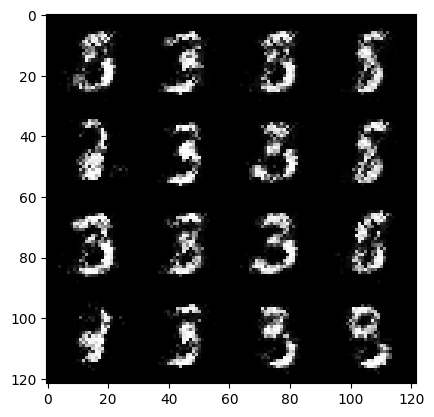

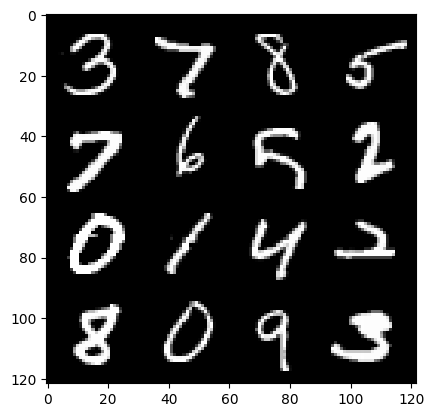

34 : step 16200 / Gen Loss: 6.216575981775925 / Disc Loss: 0.019429322890161225


  0%|          | 0/469 [00:00<?, ?it/s]

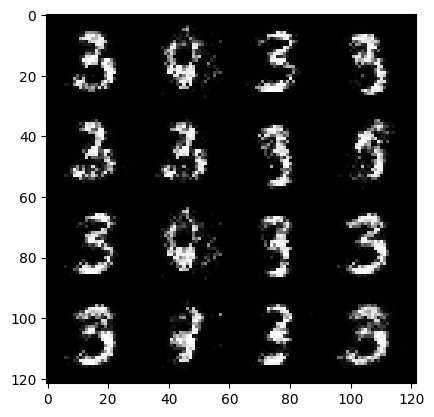

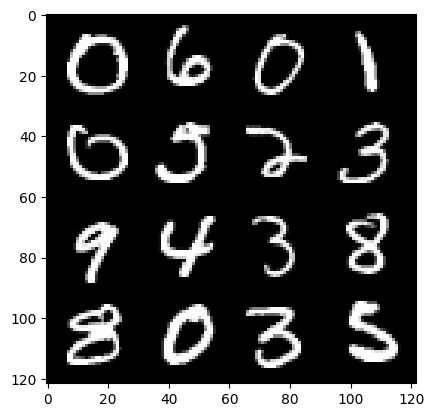

35 : step 16500 / Gen Loss: 6.278372108141576 / Disc Loss: 0.02184449047238255


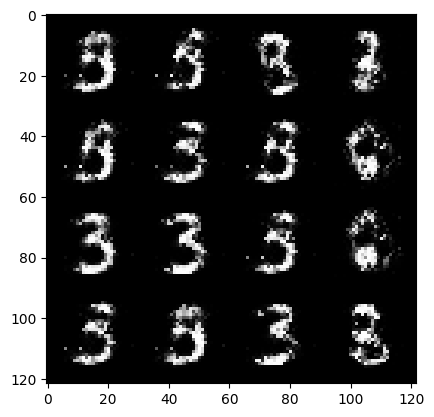

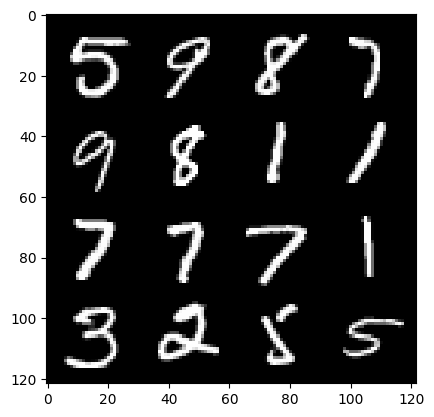

35 : step 16800 / Gen Loss: 6.045927669207249 / Disc Loss: 0.02056155057003102


  0%|          | 0/469 [00:00<?, ?it/s]

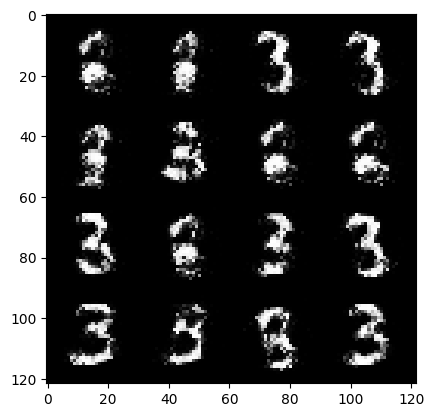

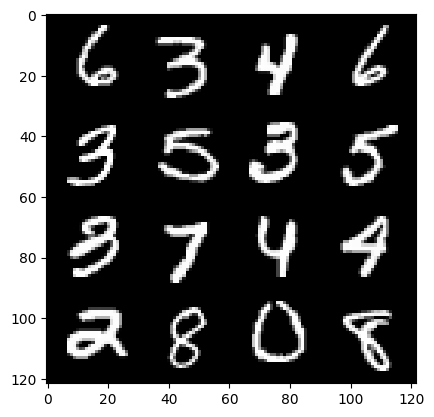

36 : step 17100 / Gen Loss: 6.299519465764363 / Disc Loss: 0.01958083292314161


  0%|          | 0/469 [00:00<?, ?it/s]

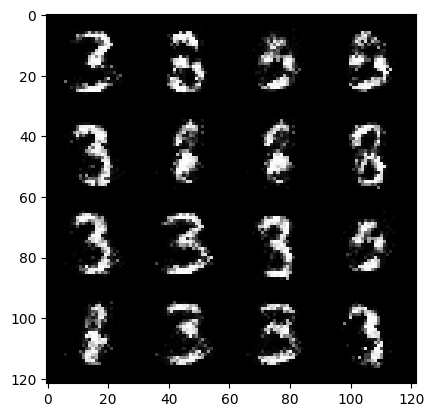

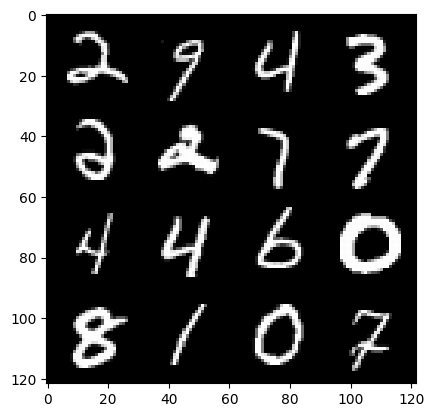

37 : step 17400 / Gen Loss: 6.617778271039325 / Disc Loss: 0.02486349227294948


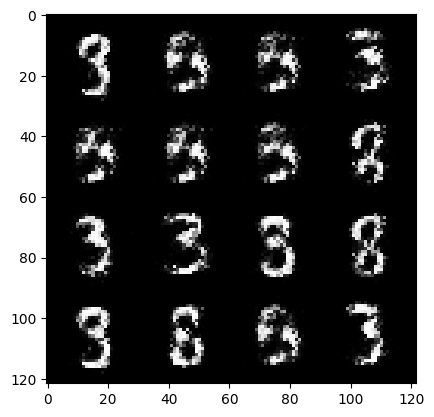

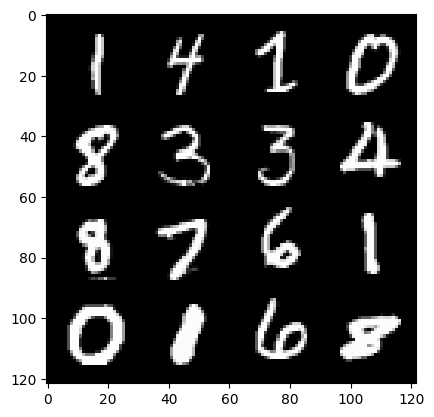

37 : step 17700 / Gen Loss: 6.003227057456972 / Disc Loss: 0.030560373988312954


  0%|          | 0/469 [00:00<?, ?it/s]

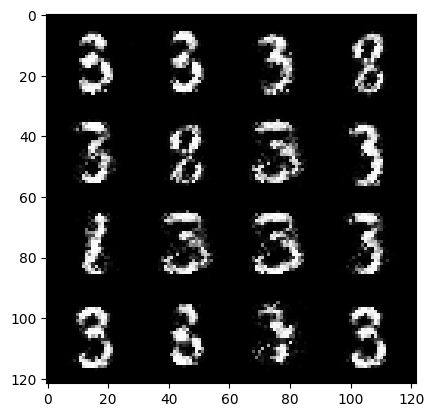

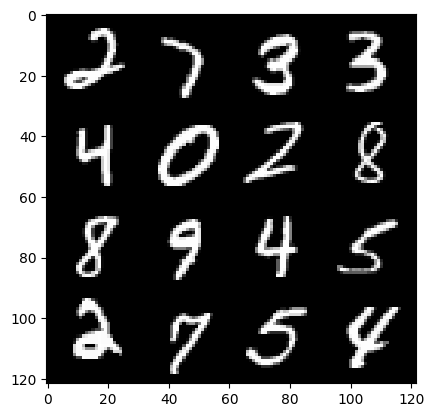

38 : step 18000 / Gen Loss: 5.973894384702046 / Disc Loss: 0.03366594890908651


  0%|          | 0/469 [00:00<?, ?it/s]

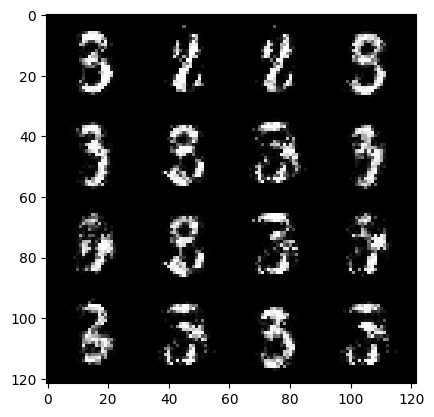

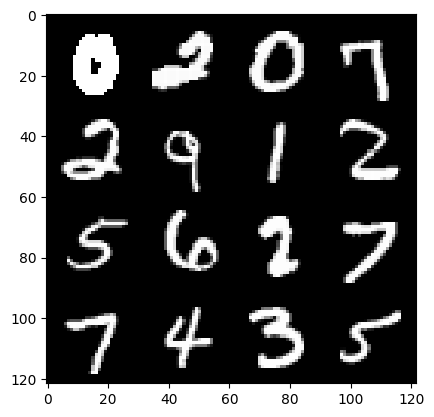

39 : step 18300 / Gen Loss: 5.570848929087316 / Disc Loss: 0.03569274539593609


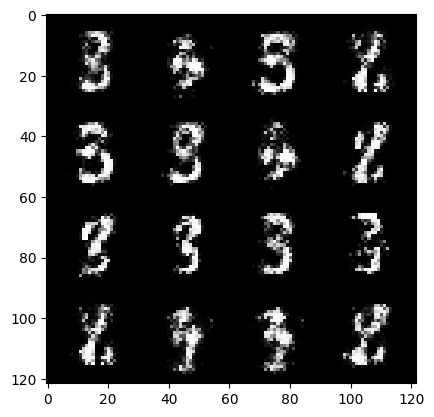

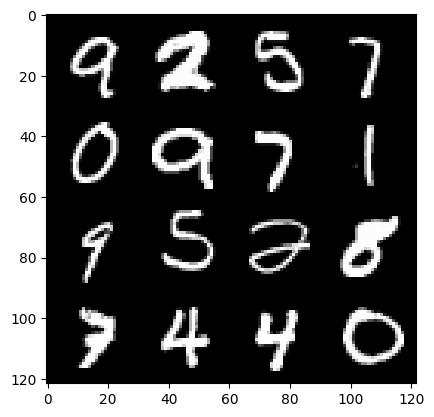

39 : step 18600 / Gen Loss: 6.117195239067077 / Disc Loss: 0.03146984420871984


  0%|          | 0/469 [00:00<?, ?it/s]

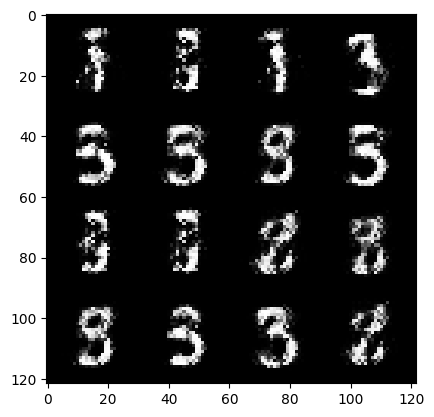

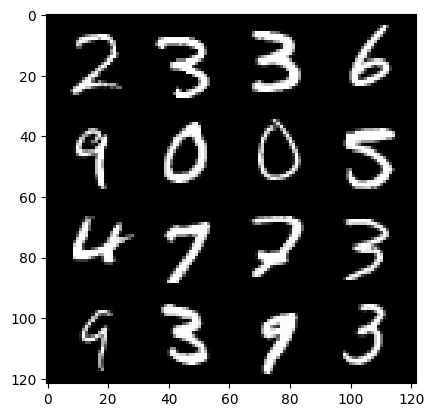

40 : step 18900 / Gen Loss: 6.176327416102092 / Disc Loss: 0.02742018324943879


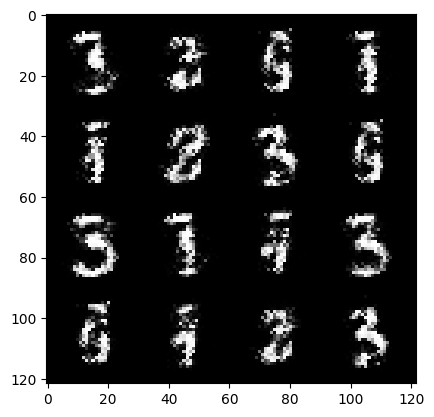

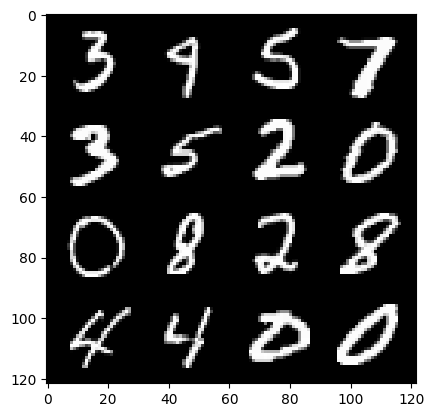

40 : step 19200 / Gen Loss: 6.004013462066652 / Disc Loss: 0.030052227693765116


  0%|          | 0/469 [00:00<?, ?it/s]

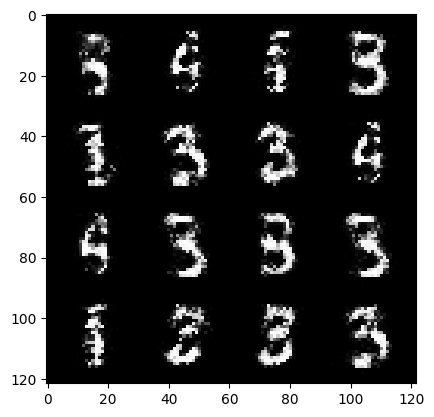

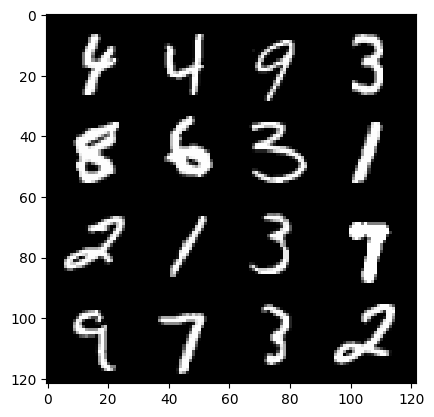

41 : step 19500 / Gen Loss: 5.914419953028364 / Disc Loss: 0.032447579282646376


  0%|          | 0/469 [00:00<?, ?it/s]

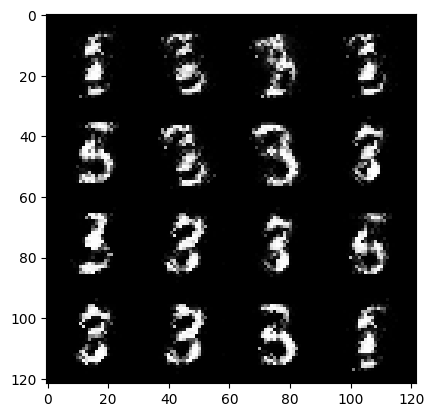

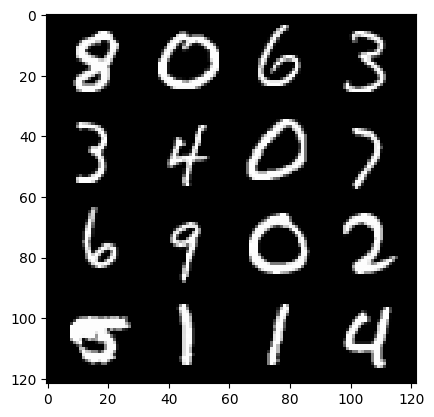

42 : step 19800 / Gen Loss: 5.960398468971252 / Disc Loss: 0.03885590032519149


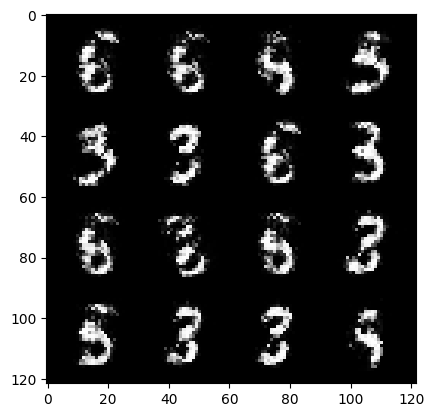

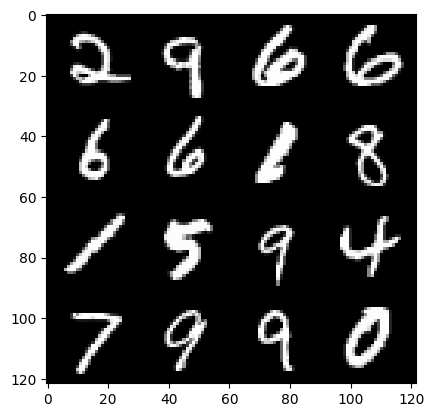

42 : step 20100 / Gen Loss: 5.593208624521893 / Disc Loss: 0.04406146732469396


  0%|          | 0/469 [00:00<?, ?it/s]

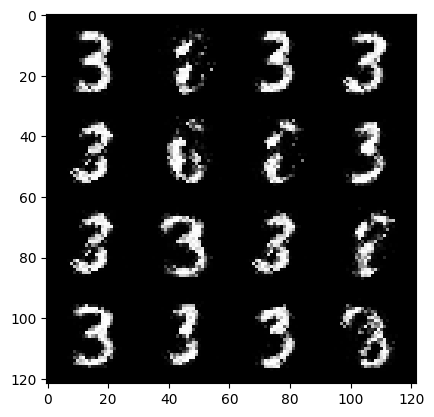

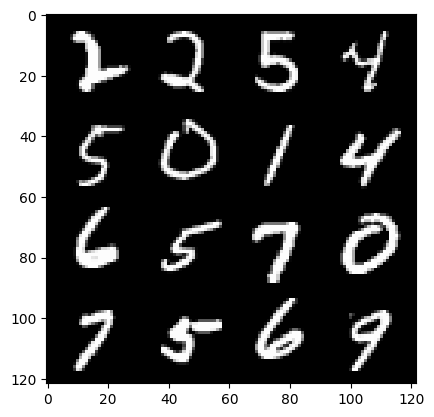

43 : step 20400 / Gen Loss: 5.894162349700934 / Disc Loss: 0.04150262624646227


  0%|          | 0/469 [00:00<?, ?it/s]

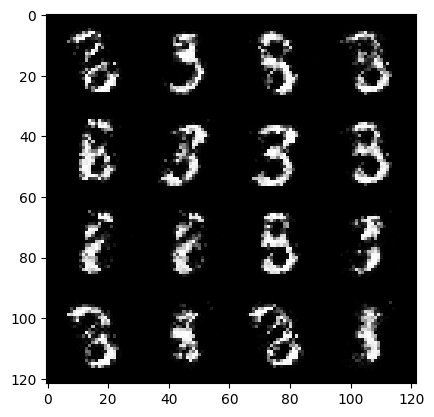

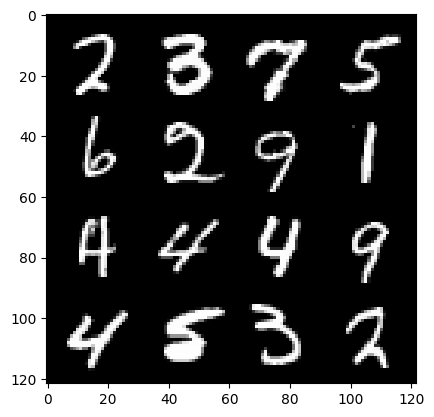

44 : step 20700 / Gen Loss: 5.935343427658083 / Disc Loss: 0.040298214068946715


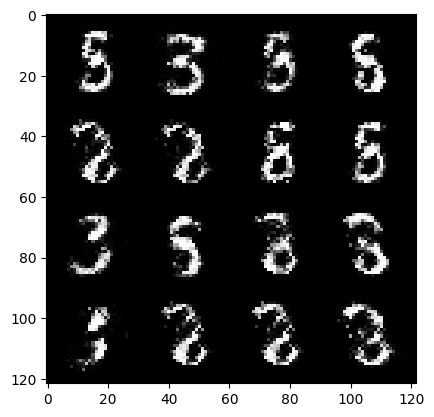

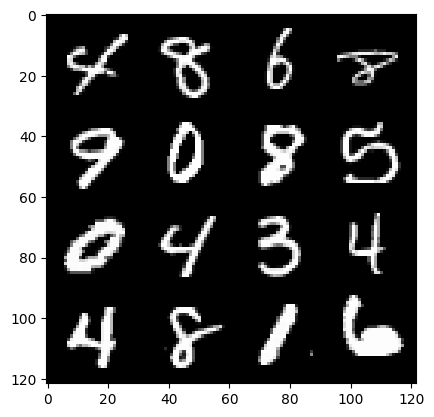

44 : step 21000 / Gen Loss: 5.63691828886668 / Disc Loss: 0.046212388984858986


  0%|          | 0/469 [00:00<?, ?it/s]

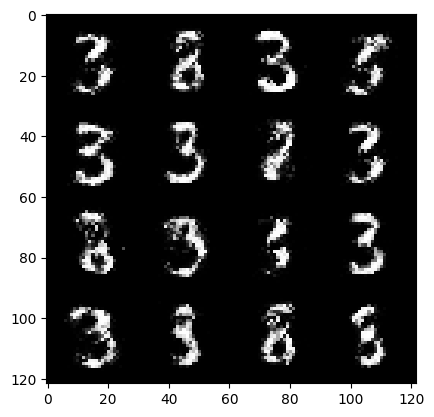

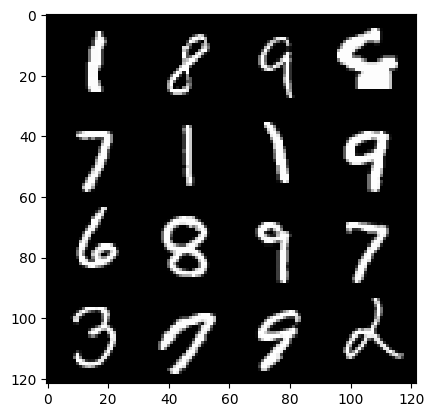

45 : step 21300 / Gen Loss: 5.788548623720807 / Disc Loss: 0.04412629052375753


  0%|          | 0/469 [00:00<?, ?it/s]

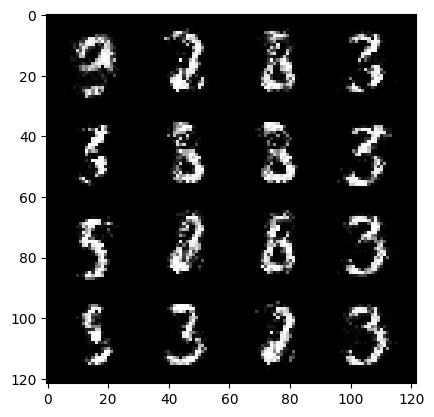

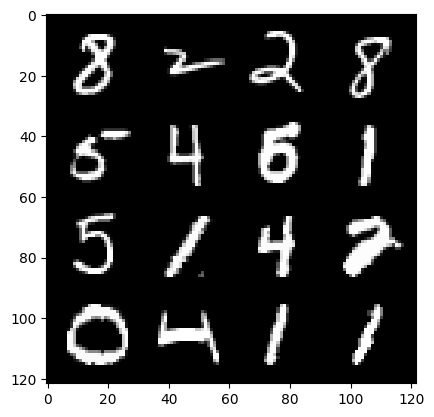

46 : step 21600 / Gen Loss: 5.652945092519123 / Disc Loss: 0.04490153077679374


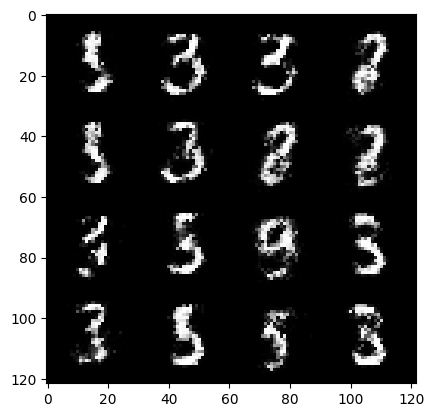

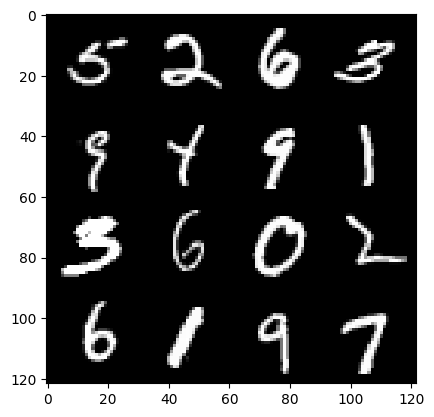

46 : step 21900 / Gen Loss: 5.691425881385804 / Disc Loss: 0.04930565958842633


  0%|          | 0/469 [00:00<?, ?it/s]

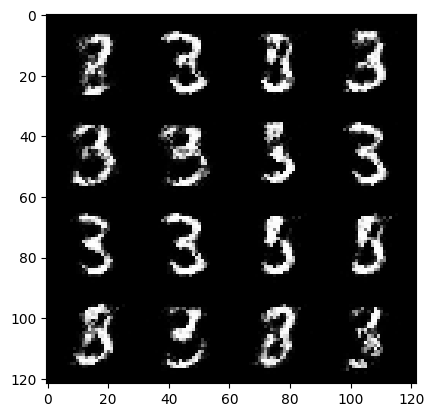

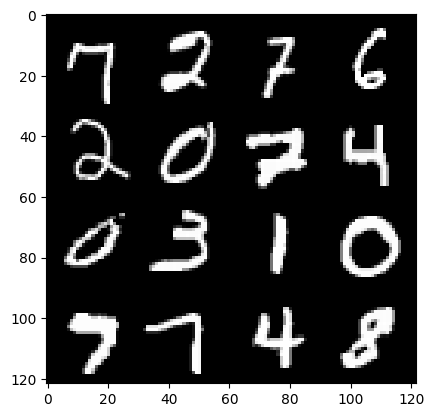

47 : step 22200 / Gen Loss: 5.426657258669535 / Disc Loss: 0.05652550769038501


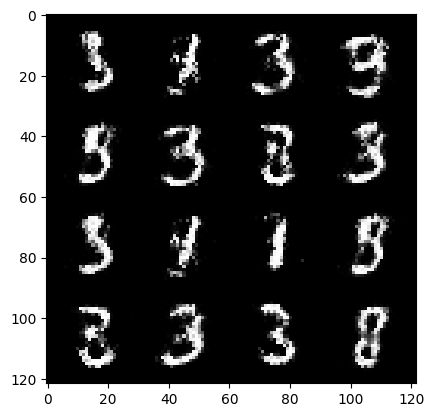

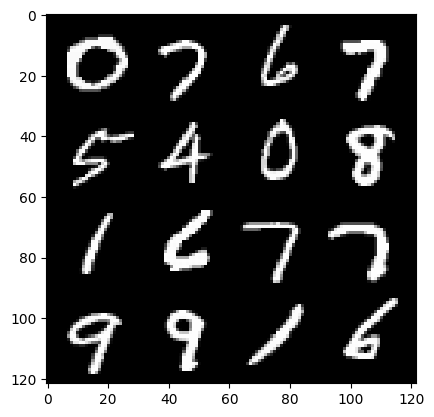

47 : step 22500 / Gen Loss: 5.53086491584778 / Disc Loss: 0.05033428920432927


  0%|          | 0/469 [00:00<?, ?it/s]

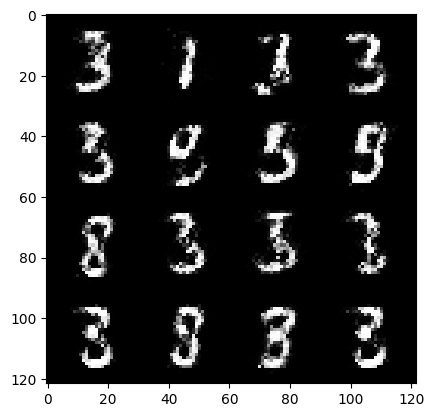

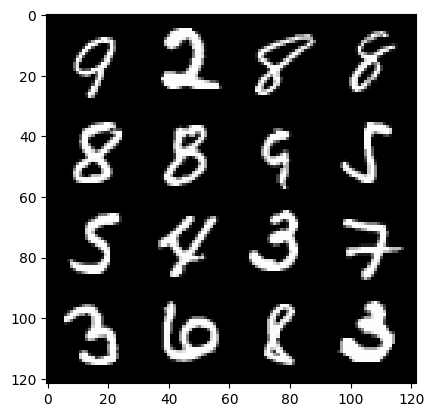

48 : step 22800 / Gen Loss: 5.515927027066555 / Disc Loss: 0.05281353440446157


  0%|          | 0/469 [00:00<?, ?it/s]

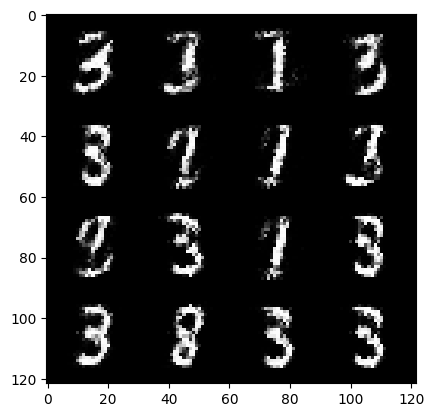

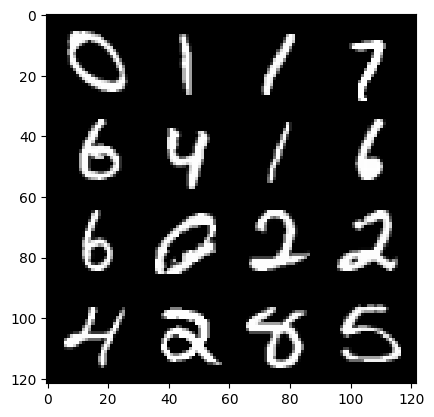

49 : step 23100 / Gen Loss: 5.475040240287781 / Disc Loss: 0.050088159252579


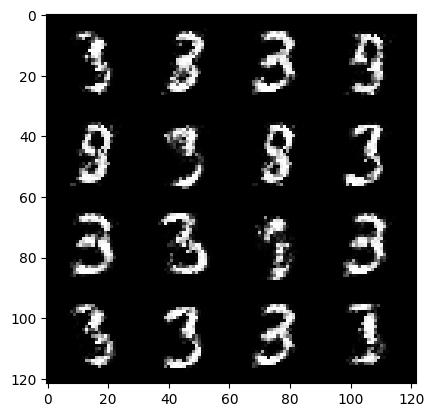

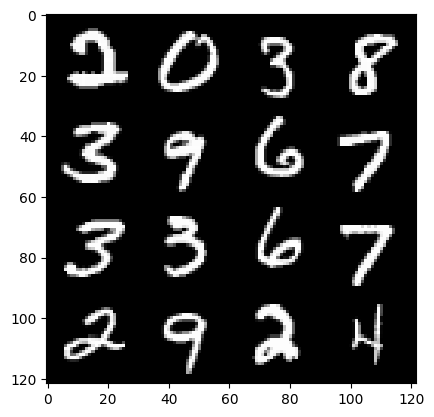

49 : step 23400 / Gen Loss: 5.6092528072992955 / Disc Loss: 0.05217619745371244


In [ ]:
#~~~~ 600000 / 128 = 468.75 aprox. 469 steps in each epoch ~~~~
#~~~~ Each step is going to process 128 images = size of the batch (except the last one) ~~~~

for epoch in range(epochs):
  for real, _ in tqdm(dataloader):
    ## Discriminator
    disc_opt.zero_grad()

    cur_bs = len(real) # real: 128 x 1x 28 x 28
    real = real.view(cur_bs,-1) # 128 x 784
    real = real.to(device)

    disc_loss = calc_disc_loss(loss_func, gen, disc, cur_bs, real, z_dim)

    disc_loss.backward(retain_graph = True)
    disc_opt.step()

    ## Generator

    gen_opt.zero_grad()
    gen_loss = calc_gen_loss(loss_func, gen, disc, cur_bs, z_dim)
    gen_loss.backward(retain_graph = True)
    gen_opt.step()

    ## Visualization
    mean_disc_loss += disc_loss.item()/info_step
    mean_gen_loss += gen_loss.item()/info_step

    if cur_step % info_step == 0 and cur_step > 0:
      fake_noise = gen_noise(cur_bs, z_dim)
      fake = gen(fake_noise)
      show(fake)
      show(real)
      print(f"{epoch} : step {cur_step} / Gen Loss: {mean_gen_loss} / Disc Loss: {mean_disc_loss}")
      mean_gen_loss, mean_disc_loss = 0,0
    cur_step += 1